# Minimum variance portfolio optimization

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from quantfinlib.portfolio.minimum_variance import MinimumVariance
from quantfinlib.math.cov import _cor_block_diagonal, _cor_to_cov

### Minimum Variance Portfolio Optimization for Synthetic Block Diagonal Covariance Matrices

In this example, we generate two 4x4 block diagonal covariance matrices with distinct cross-correlation levels within blocks. The first matrix is derived from a correlation matrix with high cross-correlation within blocks, while the second matrix is generated from a correlation matrix with low cross-correlation between blocks.

In both cases, the standard deviations of the individual asset returns are $[0.01,0.02,0.03,0.04]$, corresponding to assets a, b, c, and d, respectively, sorted from least volatile to most volatile.

We demonstrate how minimum variance portfolio optimization allocates weights to synthetic assets, showcasing the impact of different correlation structures on portfolio composition.

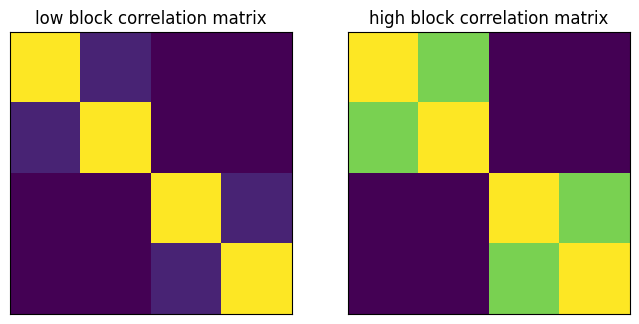

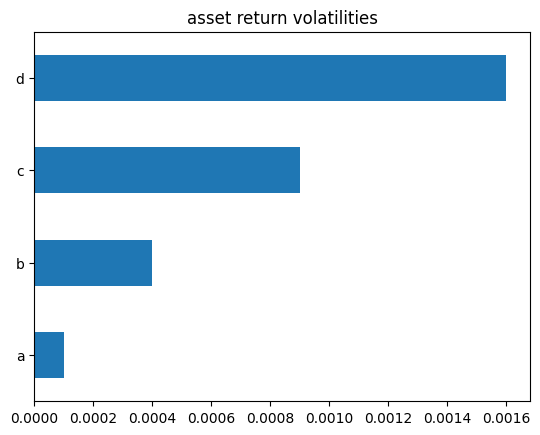

In [2]:
LOW_BLOCK_CORRELATIONS = [.1, .1]
HIGH_BLOCK_CORRELATIONS = [.8, .8]
BLOCK_SIZES = [2, 2]
STDS = [.01, .02, .03, .04]
asset_names = ['a', 'b', 'c', 'd']

corr_low_block = _cor_block_diagonal(block_sizes=BLOCK_SIZES, block_cors=LOW_BLOCK_CORRELATIONS)
cov_low_block = _cor_to_cov(cor=corr_low_block, std=STDS)
corr_high_block = _cor_block_diagonal(block_sizes=BLOCK_SIZES, block_cors=HIGH_BLOCK_CORRELATIONS)
cov_high_block = _cor_to_cov(cor=corr_high_block, std=STDS)
cov_low_block = pd.DataFrame(cov_low_block, columns=asset_names, index=asset_names)
cov_high_block = pd.DataFrame(cov_high_block, columns=asset_names, index=asset_names)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(corr_low_block, cmap='viridis', vmin=0, vmax=1)
axs[0].set_title('low block correlation matrix')
axs[1].imshow(corr_high_block, cmap='viridis', vmin=0, vmax=1)
axs[1].set_title('high block correlation matrix')
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()
plt.close()

pd.Series(np.array(STDS)**2., index=asset_names).plot(kind='barh', title='asset return volatilities')
plt.show()
plt.close()

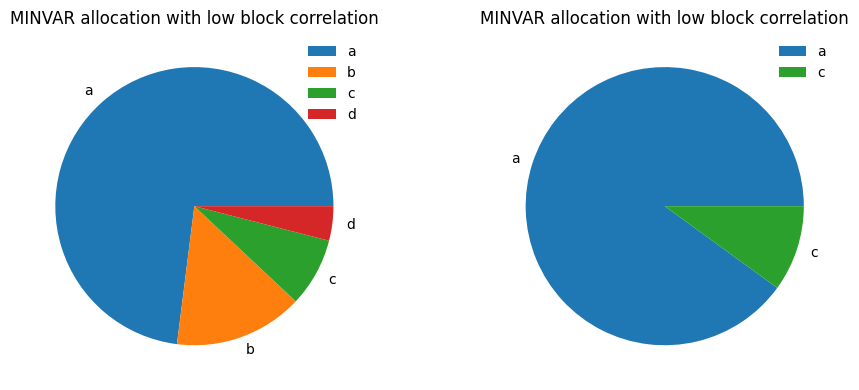

In [3]:

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

for i, cov in enumerate([cov_low_block, cov_high_block]):
    min_var = MinimumVariance(cov)
    min_var.optimize()
    min_var.weights.round(2).plot(kind='pie', ax=axs[i], )

axs[0].set_title('MINVAR allocation with low block correlation')
axs[1].set_title('MINVAR allocation with low block correlation')
for ax in axs:
    ax.legend(frameon=False)
plt.tight_layout()
plt.show()
plt.close()

#### Effect of introducing constraints to minimum variance portfolio optimization

In [4]:
upper_bound_constraints = {name: 0.5 for name in asset_names}
lower_bound_constraints = {name: 0.1 for name in asset_names}

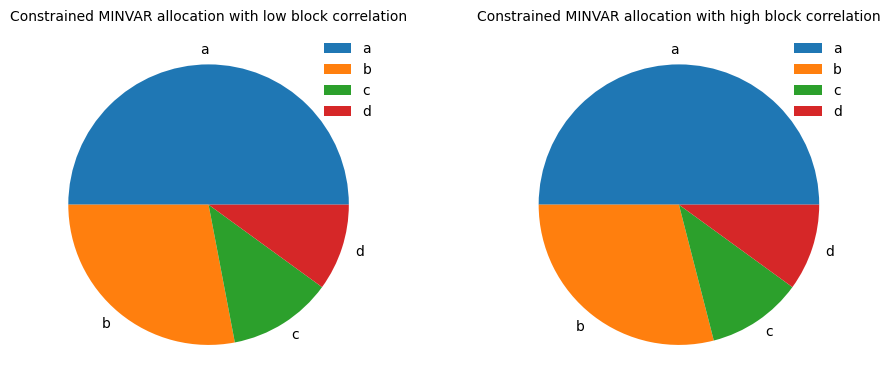

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

for i, cov in enumerate([cov_low_block, cov_high_block]):
    min_var = MinimumVariance(
        cov_matrix=cov, 
        upper_bound_constraints=upper_bound_constraints,
        lower_bound_constraints=lower_bound_constraints
    )
    min_var.optimize()
    min_var.weights.round(2).plot(kind='pie', ax=axs[i], )

axs[0].set_title('Constrained MINVAR allocation with low block correlation', fontsize=10)
axs[1].set_title('Constrained MINVAR allocation with high block correlation', fontsize=10)
for ax in axs:
    ax.legend(frameon=False)
plt.tight_layout()
plt.show()
plt.close()